In [1]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt


delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

Text(0.5, 1.0, 'Simplest default with labels')

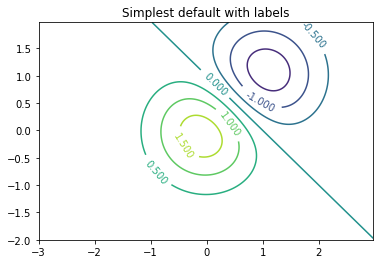

In [2]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Simplest default with labels')

Text(0.5, 1.0, 'labels at selected locations')

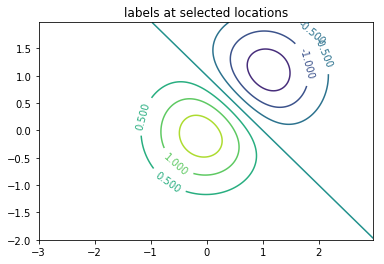

In [3]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
manual_locations = [(-1, -1.4), (-0.62, -0.7), (-2, 0.5), (1.7, 1.2), (2.0, 1.4), (2.4, 1.7)]
ax.clabel(CS, inline=1, fontsize=10, manual=manual_locations)
ax.set_title('labels at selected locations')

Text(0.5, 1.0, 'Single color - negative contours dashed')

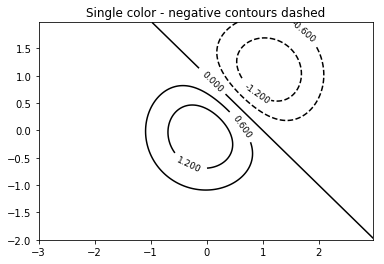

In [4]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, 6,
                 colors='k',  # negative contours will be dashed by default
                 )
ax.clabel(CS, fontsize=9, inline=1)
ax.set_title('Single color - negative contours dashed')

Text(0.5, 1.0, 'Single color - negative contours solid')

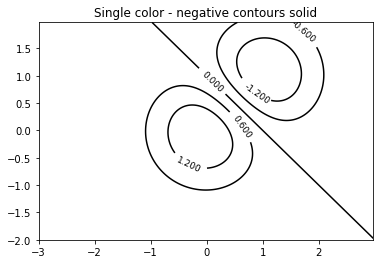

In [5]:
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, 6,
                 colors='k',  # negative contours will be dashed by default
                 )
ax.clabel(CS, fontsize=9, inline=1)
ax.set_title('Single color - negative contours solid')

Text(0.5, 1.0, 'Crazy lines')

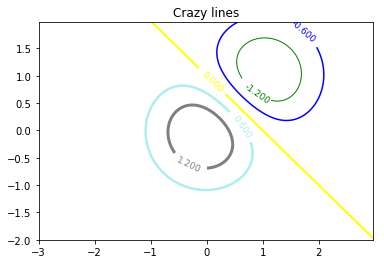

In [6]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, 6,
                 linewidths=np.arange(.5, 4, .5),
                 colors=('r', 'green', 'blue', (1, 1, 0), '#afeeee', '0.5')
                 )
ax.clabel(CS, fontsize=9, inline=1)
ax.set_title('Crazy lines')

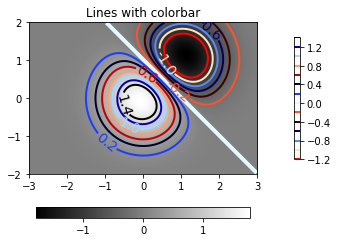

In [7]:
fig, ax = plt.subplots()
im = ax.imshow(Z, interpolation='bilinear', origin='lower',
                cmap=cm.gray, extent=(-3, 3, -2, 2))
levels = np.arange(-1.2, 1.6, 0.2)
CS = ax.contour(Z, levels, origin='lower', cmap='flag',
                linewidths=2, extent=(-3, 3, -2, 2))

# Thicken the zero contour.
zc = CS.collections[6]
plt.setp(zc, linewidth=4)

ax.clabel(CS, levels[1::2],  # label every second level
          inline=1, fmt='%1.1f', fontsize=14)

# make a colorbar for the contour lines
CB = fig.colorbar(CS, shrink=0.8, extend='both')

ax.set_title('Lines with colorbar')

# We can still add a colorbar for the image, too.
CBI = fig.colorbar(im, orientation='horizontal', shrink=0.8)

# This makes the original colorbar look a bit out of place,
# so let's improve its position.

l, b, w, h = ax.get_position().bounds
ll, bb, ww, hh = CB.ax.get_position().bounds
CB.ax.set_position([ll, b + 0.1*h, ww, h*0.8])

plt.show()

XX.shape: (1000, 1000)
YY.shape: (1000, 1000)


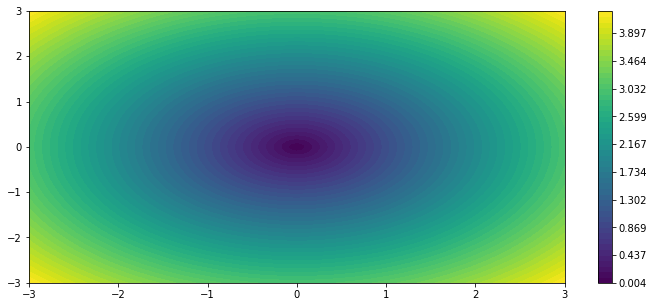

In [8]:
Xmesh, Ymesh = np.meshgrid(np.linspace(-3.0, 3.0, 1000),
                     np.linspace(-3.0, 3.0, 1000)
                    )
print("XX.shape: {}".format(Xmesh.shape))
print("YY.shape: {}".format(Ymesh.shape))
Z = np.sqrt(Xmesh**2 + Ymesh**2 )

plt.figure(figsize=(12, 5))
"""levels에 구간을 넣어줘서 등고선 표시 위치를 정할 수 있습니다. 
"""
cp = plt.contourf(Xmesh, Ymesh, Z, 
                 levels = np.linspace(Z.reshape(-1, 1).min(), Z.reshape(-1, 1).max(), 50)
                )
plt.colorbar(cp)
plt.show()

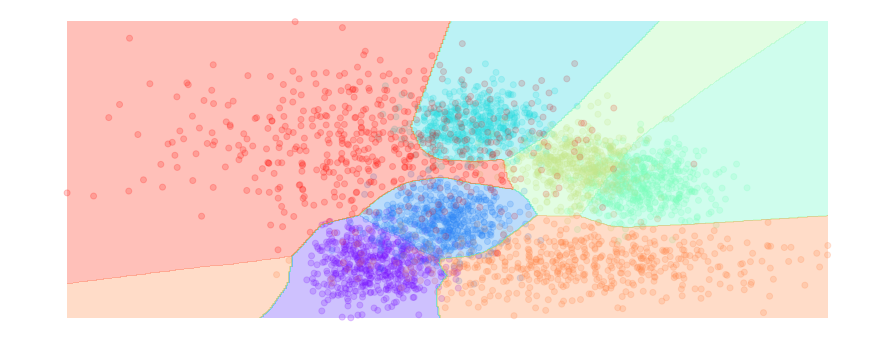

In [10]:
# 출처 : https://frhyme.github.io/python-lib/plot_decision_boundary/

import numpy as np
import matplotlib.pyplot as plt

"""
x, y를 각각의 평균과 분산에 따라서 생성해주는 함수를 만들었습니다. 
np.vstack은 세로로 쌓아줍니다.
(1, nrow)
(1, nrow)
"""
def normal_sampling(mu1, v1, mu2, v2, nrow):
    x = np.random.normal(mu1, v1, nrow)
    y = np.random.normal(mu2, v2, nrow)
    return np.vstack([x,y])
"""
다양한 평균과 분산에 대해서 샘플링하여 쌓아줍니다. 
np.hstack은 가로로 붙여줍니다. 
그래서 마지막에 Transpose 했습니다. 
"""
sample_size = 500
cluster_num = 3
X = np.hstack([
    normal_sampling(0, 1, 0, 1, sample_size),
    normal_sampling(2, 1, 2, 1, sample_size), 
    normal_sampling(3, 1, 7, 1, sample_size),
    normal_sampling(8, 1, 4, 1, sample_size),
    normal_sampling(6, 1, 5, 1, sample_size),
    normal_sampling(6, 3, 0, 1, sample_size),
    normal_sampling(0, 3, 6, 2, sample_size)
]).T
Y = []
for i in range(0, X.shape[0]//sample_size):
    Y+=[i for j in range(0, sample_size)]
Y = np.array(Y)

plt.figure(figsize=(15, 6))
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.rainbow, alpha=0.2)

"""
대충 학습을 시키고요...
"""
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=[50, 50, 10], activation='relu')
clf.fit(X, Y)
#print(clf.score(X, Y))

"""
grid_size를 대충 잡고, 인공적으로 값들을 만들어줍니다. 
이를 활용해서 np.meshgrid를 만들고, 이 값들별로 class를 에측하고, 컨투어를 그려줍니다. 
"""
grid_size = 500
A, B = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), grid_size),
                   np.linspace(X[:, 1].min(), X[:, 1].max(), grid_size))
C = clf.predict( np.hstack([A.reshape(-1, 1), B.reshape(-1, 1)]) ).reshape(grid_size, grid_size)
plt.contourf(A, B, C, alpha=0.3, cmap=plt.cm.rainbow)
plt.axis('off')
plt.show()

In [11]:
A

array([[-9.33802511, -9.29210847, -9.24619183, ..., 13.48254513,
        13.52846178, 13.57437842],
       [-9.33802511, -9.29210847, -9.24619183, ..., 13.48254513,
        13.52846178, 13.57437842],
       [-9.33802511, -9.29210847, -9.24619183, ..., 13.48254513,
        13.52846178, 13.57437842],
       ...,
       [-9.33802511, -9.29210847, -9.24619183, ..., 13.48254513,
        13.52846178, 13.57437842],
       [-9.33802511, -9.29210847, -9.24619183, ..., 13.48254513,
        13.52846178, 13.57437842],
       [-9.33802511, -9.29210847, -9.24619183, ..., 13.48254513,
        13.52846178, 13.57437842]])

In [12]:
B

array([[-2.78150052, -2.78150052, -2.78150052, ..., -2.78150052,
        -2.78150052, -2.78150052],
       [-2.75132103, -2.75132103, -2.75132103, ..., -2.75132103,
        -2.75132103, -2.75132103],
       [-2.72114154, -2.72114154, -2.72114154, ..., -2.72114154,
        -2.72114154, -2.72114154],
       ...,
       [12.21770408, 12.21770408, 12.21770408, ..., 12.21770408,
        12.21770408, 12.21770408],
       [12.24788357, 12.24788357, 12.24788357, ..., 12.24788357,
        12.24788357, 12.24788357],
       [12.27806306, 12.27806306, 12.27806306, ..., 12.27806306,
        12.27806306, 12.27806306]])

In [13]:
C

array([[5, 5, 5, ..., 5, 5, 5],
       [5, 5, 5, ..., 5, 5, 5],
       [5, 5, 5, ..., 5, 5, 5],
       ...,
       [6, 6, 6, ..., 3, 3, 3],
       [6, 6, 6, ..., 3, 3, 3],
       [6, 6, 6, ..., 3, 3, 3]])

In [14]:
C.shape

(500, 500)